***读取加州房价数据集***

In [1]:
import pandas as pd
from holoviews.examples.gallery.apps.bokeh.crossfilter import color
from sympy.printing.pretty.pretty_symbology import line_width

df_housing = pd.read_csv("house.csv")

In [2]:
# 构建特征集X
X = df_housing.drop("median_house_value", axis=1)
# 构建标签集y
y = df_housing.median_house_value

将数据集拆解为训练集和测试集

In [3]:
from sklearn.model_selection import train_test_split
# random_state 的作用：确保每次运行时的结果一致，便于调试和验证。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

用线性回归模型训练数据集

In [4]:
from sklearn.linear_model import LinearRegression # 导入线性回归算法模型
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

预测测试集的房价

In [5]:
y_pred = model.predict(X_test)
print("房价真实价值（测试集）:", y_test)
print("房价预测值（测试集）:", y_pred)

房价真实价值（测试集）: 10941    142700.0
5250     500001.0
10292     61800.0
2266     162800.0
6398      90600.0
           ...   
4706     211400.0
8404     500001.0
11114    162500.0
7877     360700.0
6188     137500.0
Name: median_house_value, Length: 3400, dtype: float64
房价预测值（测试集）: [143770.39502967 398615.57056491  86341.10306745 ...  26482.39645031
 283556.48183169 115808.80622262]


In [6]:
print("给模型评分:", model.score(X_test, y_test))

给模型评分: 0.6636396350243731


D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabt

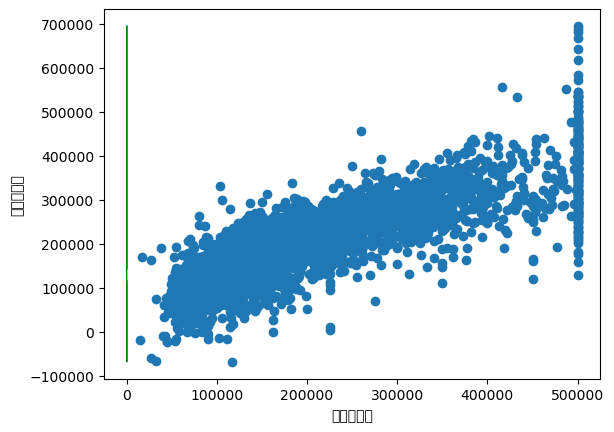

In [7]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)# 散点图
# 画出回归函数
plt.plot(X_test.median_income, y_pred, color = 'green', linewidth=1)
plt.xlabel("中位数收入")
plt.ylabel("中位数房价")
plt.show()